In [93]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Loading the data
data = pd.read_csv(r'movies.csv')

In [94]:
#Let's look at the data
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [95]:
#Let's see if there is any missing data
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [96]:
# drop duplicates if there's one
data.drop_duplicates(inplace=True)

In [97]:
print("Shape of data: ", data.shape)
print("Duplicated rows: ", data.duplicated(keep=False).sum())
print("-" * 40)
print("Missing values count:\n", data.isnull().sum())
print("-" * 40)
print("If drop all NAs: ", data.dropna().shape)

Shape of data:  (7668, 15)
Duplicated rows:  0
----------------------------------------
Missing values count:
 name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
----------------------------------------
If drop all NAs:  (5421, 15)


##### -Dataset contains 7668 rows and 15 columns.
##### -5421 rows out of 7668 don't have NAs.
##### -Dataset doesn't contain duplicated rows.
##### We need 'budget' and 'gross' to calculate the target variable ('success'). Coincidentally, these two columns contain the most amount of NAs.
##### 5421 rows create a big enough dataset. Let's just drop NAs.

In [98]:
##This will drop any rows with null values
##df = df.dropna(how='any',axis=0) 

In [99]:
# drop NAs

df = data.dropna().copy()
df['success'] = df.apply(lambda row: 1 if row["gross"] > row["budget"] else 0, axis = 1)
df.success.value_counts(normalize=True)

1    0.678288
0    0.321712
Name: success, dtype: float64

##### The dataset is unbalanced. We have more successful movies (67.8%) than not (32.2%).

In [100]:
#Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
success - 0.0%


In [101]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
success       int64
dtype: object

In [102]:
# Change data type of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [103]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,success
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1


In [104]:
# how many values are in the 'released' column, that doesn't have a full date?
df['released'].apply(lambda x: len(x.split('(')[0].split()) != 3).sum()

14

In [105]:
# drop these rows
df.drop(df[df['released'].apply(lambda x: len(x.split('(')[0].split()))!= 3].index, inplace=True)
df['released'].apply(lambda x: len(x.split('(')[0].split()) != 3).sum()

0

In [106]:
# convert 'released' to datetime type
df['released'] = df['released'].apply(lambda x: x.split('(')[0])
df['released'] = pd.to_datetime(df['released'])

In [107]:
##This will add the released date column into a separate column
##df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [108]:
# get month, day, and day of the week and yearcorrect from released
#df['month'] = df['released'].dt.month
#df['day'] = df['released'].dt.day
#df['week_day'] = df['released'].dt.dayofweek
df['year'] = df['released'].dt.year

In [109]:
# reorder columns
df = df[['name', 'rating', 'genre', 'released', 'year', 'score', 'votes', 'director', 'writer', 'star',
                          'country', 'budget', 'gross', 'company', 'runtime', 'success']].copy()
df.head(3)

,name,rating,genre,released,year,score,votes,director,writer,star,country,budget,gross,company,runtime,success
0,The Shining,R,Drama,1980-06-13,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1
1,The Blue Lagoon,R,Adventure,1980-07-02,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1


In [110]:
# Sort by gross values
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [111]:
#pd.set_option('display.max_rows', None)

In [112]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1469, dtype: object

In [113]:
# The question is what is most correlated to gross
# My guess: 
# Frist Thought: Budget high correlation
# Company high correlation

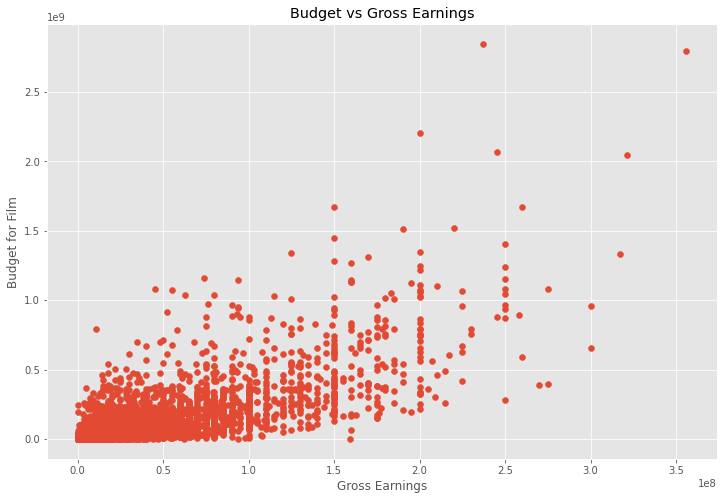

In [114]:
# Scatter plot with budget vs gross
 
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [115]:
df.head()

,name,rating,genre,released,year,score,votes,director,writer,star,country,budget,gross,company,runtime,success
5445,Avatar,PG-13,Action,2009-12-18,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,1
7445,Avengers: Endgame,PG-13,Action,2019-04-26,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,1
3045,Titanic,PG-13,Drama,1997-12-19,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,1
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,1


<AxesSubplot:xlabel='budget', ylabel='gross'>

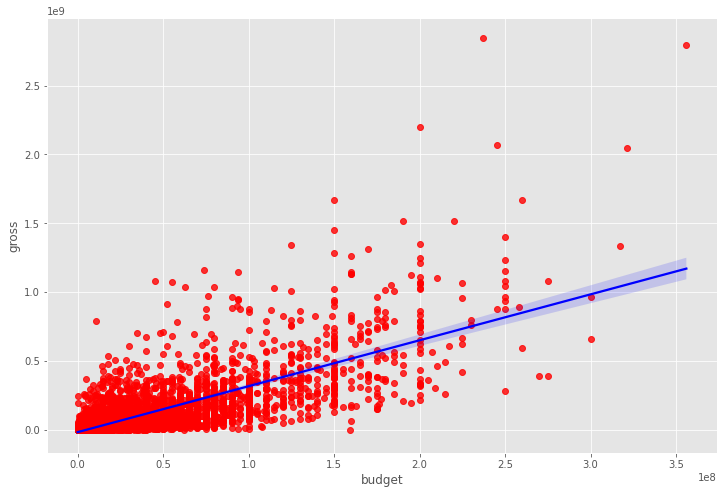

In [116]:
# Plot the budget vs Gross uning Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [117]:
# Let's start looking at correlation

In [118]:
# Only work on numerical
df.corr(method='pearson') #pearson, kandall, spearman

,year,score,votes,budget,gross,runtime,success
year,1.000000,0.061443,0.202215,0.319669,0.268141,0.075183,0.167571
score,0.061443,1.000000,0.474594,0.071552,0.222504,0.414501,0.217650
votes,0.202215,0.474594,1.000000,0.439077,0.614432,0.352263,0.308155
budget,0.319669,0.071552,0.439077,1.000000,0.740028,0.318353,0.174541
gross,0.268141,0.222504,0.614432,0.740028,1.000000,0.275641,0.330305
runtime,0.075183,0.414501,0.352263,0.318353,0.275641,1.000000,0.050302
success,0.167571,0.217650,0.308155,0.174541,0.330305,0.050302,1.000000


In [119]:
# High correlation between Budget and Gross
# I was right

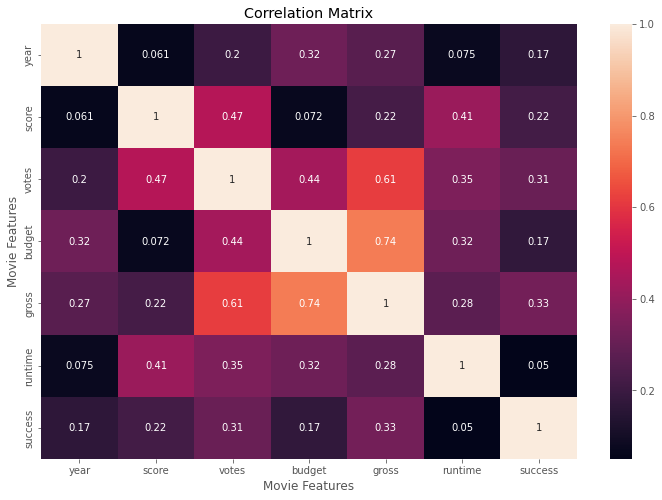

In [120]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [121]:
# Look at company
df.head()

,name,rating,genre,released,year,score,votes,director,writer,star,country,budget,gross,company,runtime,success
5445,Avatar,PG-13,Action,2009-12-18,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,1
7445,Avengers: Endgame,PG-13,Action,2019-04-26,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,1
3045,Titanic,PG-13,Drama,1997-12-19,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,1
7244,Avengers: Infinity War,PG-13,Action,2018-04-27,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,1


In [122]:
# Change every objects Columns to category type
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized       
    

,name,rating,genre,released,year,score,votes,director,writer,star,country,budget,gross,company,runtime,success
5445,386,5,0,2009-12-18,2009,7.8,1100000,781,1260,1527,47,237000000,2847246203,1376,162.0,1
7445,388,5,0,2019-04-26,2019,8.4,903000,105,510,1463,47,356000000,2797501328,978,181.0,1
3045,4895,5,6,1997-12-19,1997,7.8,1100000,781,1260,1067,47,200000000,2201647264,1376,194.0,1
6663,3632,5,0,2015-12-18,2015,7.8,876000,765,1803,355,47,245000000,2069521700,940,138.0,1
7244,389,5,0,2018-04-27,2018,8.4,897000,105,510,1463,47,321000000,2048359754,978,149.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3782,6,6,2015-01-15,2015,5.8,3500,583,2920,1491,47,3000000,5073,1379,96.0,0
2434,2958,5,0,1994-06-04,1994,4.5,1900,1801,3097,185,47,5000000,2970,1370,97.0,0
3681,1589,3,6,2001-05-11,2001,6.8,43000,948,1680,524,6,5000000,2554,462,108.0,0
272,2898,6,9,1982-03-12,1982,3.9,2300,261,54,1466,47,800000,2270,578,85.0,0


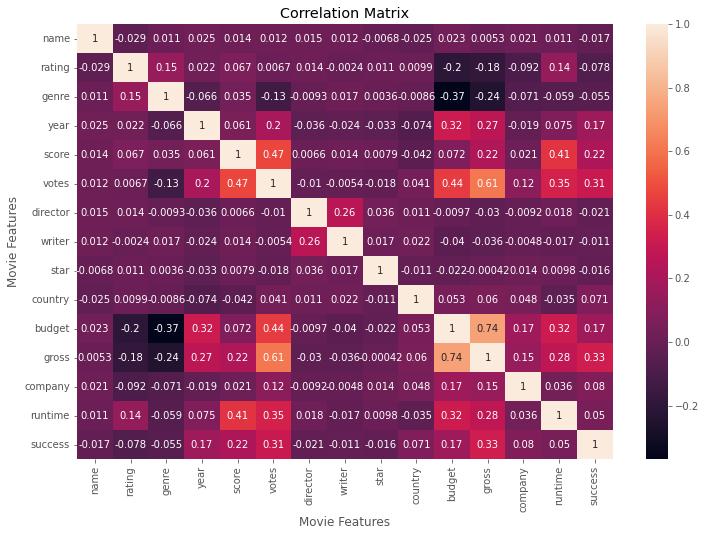

In [123]:
# Plot Haetmap for all columns
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [124]:
df_numerized.corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,success
name,1.000000,-0.029220,0.010840,0.025485,0.013644,0.012264,0.014687,0.012449,-0.006846,-0.025192,0.022954,0.005278,0.021215,0.011083,-0.016512
rating,-0.029220,1.000000,0.148529,0.022089,0.066535,0.006652,0.014283,-0.002375,0.010629,0.009889,-0.203553,-0.181739,-0.092134,0.142450,-0.078356
genre,0.010840,0.148529,1.000000,-0.066049,0.035158,-0.134986,-0.009275,0.016506,0.003601,-0.008617,-0.368226,-0.243547,-0.071046,-0.059148,-0.055285
year,0.025485,0.022089,-0.066049,1.000000,0.061443,0.202215,-0.036274,-0.024065,-0.032943,-0.074050,0.319669,0.268141,-0.019378,0.075183,0.167571
score,0.013644,0.066535,0.035158,0.061443,1.000000,0.474594,0.006557,0.014493,0.007886,-0.042119,0.071552,0.222504,0.020800,0.414501,0.217650
votes,0.012264,0.006652,-0.134986,0.202215,0.474594,1.000000,-0.010430,-0.005376,-0.018099,0.041409,0.439077,0.614432,0.117717,0.352263,0.308155
director,0.014687,0.014283,-0.009275,-0.036274,0.006557,-0.010430,1.000000,0.259625,0.035932,0.011458,-0.009708,-0.029676,-0.009179,0.018158,-0.021207
writer,0.012449,-0.002375,0.016506,-0.024065,0.014493,-0.005376,0.259625,1.000000,0.017183,0.022269,-0.039757,-0.036044,-0.004835,-0.017491,-0.010809
star,-0.006846,0.010629,0.003601,-0.032943,0.007886,-0.018099,0.035932,0.017183,1.000000,-0.011115,-0.022185,-0.000420,0.013621,0.009753,-0.015531
country,-0.025192,0.009889,-0.008617,-0.074050,-0.042119,0.041409,0.011458,0.022269,-0.011115,1.000000,0.052579,0.059910,0.047912,-0.035499,0.070778


In [126]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name       1.000000
         rating    -0.029220
         genre      0.010840
         year       0.025485
         score      0.013644
                      ...   
success  budget     0.174541
         gross      0.330305
         company    0.080210
         runtime    0.050302
         success    1.000000
Length: 225, dtype: float64

In [128]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.368226
budget   genre     -0.368226
genre    gross     -0.243547
gross    genre     -0.243547
budget   rating    -0.203553
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
success  success    1.000000
Length: 225, dtype: float64

In [130]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.614432
votes     gross       0.614432
gross     budget      0.740028
budget    gross       0.740028
name      name        1.000000
writer    writer      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
success   success     1.000000
dtype: float64

In [131]:
# votes and budget have the highest correlation to gross earnings
# company has low correlation